# Cash Flow and Budget Analysis

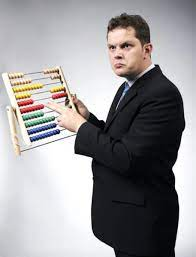


#### Recently, I've found that my spending is higher than what I have budgeted. Usually, this is a signal of overspending, but another possibility is that my budget from University is not appropriate for my lifestyle now. 

#### There are a couple of ways to get to the bottom of this. One approach to this question is to categorize each transaction and measure categories over time compared to a monthly budget. Another method is to take an average of spending over time and compare this figure to the budgeted amount. Each method has strengths and weaknesses, so using both will provide a complete answer. This analysis will use both to get to the bottom of my spending problem and determine if the problem is consistent overspending or an unachievable budget.

#### This project is more than an analysis of spending habits; it is a tool that allows me to maintain a record of spending and track changes over time. This tool uses elements of object-oriented programming, such as classes, to make it easier to perform common tasks.

### Pre-Pipeline tasks:
#### This tool uses annotated .csv files to build a record of cash flows. Here is a step-by-step process to get the information needed for this tool.
#### Step 1: Download the transaction history for the accounts you wish to track. Find these on your bank's website in your banking terminal.
#### Step 2: Open your transaction history in a spreadsheet editor. Add three columns for a description, sub-info, and spending category. For each transaction: add a description of the purchase, any other relevant info, and the spending category. For example, annotate a purchase from the grocery store as: 'Groceries', 'Purchase', and 'Food'. Try to pair each transaction with a budget category, and be consistent.
#### Step 3: In a main folder called 'AccountInfo', create separate folders for each bank account you wish to track.  
#### Step 4: Save the sheets from your spreadsheet editor as .csv files in the appropriate account folder.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Importing Data
### Classes for Importing Data
#### Below are two classes built to load in new and existing data, 'Ledger' and 'Update'. 'Ledger' is a simple script that takes the parent folder and file name of a .csv file and creates a Pandas DataFrame. If the parent folder and file are not found (maybe this is the first time running the script) 'Ledger' will create an empty DataFrame. This class also contains a save function that saves the DataFrame as a .csv file under the specified parent folder and file name.

#### 'Update' is a script for adding new account information to the existing General Ledger. 'Update' takes arguments for an existing ledger, a folder containing all new account information, and the names of the specific folders containing the account information. This file structure, a main folder containing sub-folders for each account, makes it easier to use this script for regular updates. Instead of specifying the name of each account's .csv file, simply add it to the correct folder. The 'Update' class takes the .csv files in each account folder, formats them, and appends each one to the ledger declared as an argument. Then the script removes duplicate entries, sorts by date, and resets the index.

In [3]:
class Ledger:
    def __init__(self, parent_folder_path, file_name):
        self.folder = parent_folder_path
        self.file = file_name
        if os.path.exists((self.folder+'/'+self.file)) == True:
            self.ledger = pd.read_csv((self.folder+'/'+self.file), index_col=0)
        else:
            self.ledger = pd.DataFrame()
    def save(self):
        os.makedirs(self.folder, exist_ok=True)
        self.ledger.to_csv((self.folder+'/'+self.file), index_label = 'Index')
        
class Update():
    def __init__(self, ledger, account_folder, account_names):
        
        self.ledger = ledger
        self.account_names = account_names
        
        def sheets (filename, parent_folder_path):
            frame_name = pd.DataFrame()
            path = parent_folder_path+'/'+filename
            files = [file for file in os.listdir(path) if not file.startswith('.')]
            for file in files:
                frame_name = pd.read_csv(path+'/'+file,header=None)
                frame_name.columns = ['Date','Transaction Place', 'Notes', 'SubInfo', 'Account', 'Withdrawals','Deposits','Acct.Balance']
                frame_name['Source'] = filename
                frame_name['Date'] = pd.to_datetime(frame_name['Date'])
            return frame_name
            
        data_files = list()

        for i in self.account_names:
            file = sheets(i, account_folder)
            data_files.append(file)
        
        for i in data_files:
            ledger.ledger = pd.concat([ledger.ledger, i])
            
        ledger.ledger['Date'] = pd.to_datetime(ledger.ledger['Date'])
        ledger.ledger = ledger.ledger.drop_duplicates()
        ledger.ledger = ledger.ledger.sort_values(by=['Date', 'Acct.Balance']).reset_index(drop=True)

        ledger.save()

#### Creating a Ledger object and using the Update class to add the most recent transaction histories.

In [4]:
general = Ledger('AccountInfo/General_Ledger', 'general_ledger.csv')

In [5]:
#Run the update. First declare a list with the names of account folders as str.
account_names = ['Credit_Card', 'Fixed', 'Variable', 'Savings', 'Joint', 'Stand']

Update(general, 'AccountInfo', account_names)


## Privacy
#### For privacy reasons, I have removed the 'Transaction Place' column typically found in a Bank Account Statement. Fortunately, after annotating the .csv files with account names and descriptions, this column is not necessary.

In [6]:
general.ledger.drop(labels='Transaction Place', axis=1, inplace=True)

## Data Cleaning
#### Since this dataset is composed of many different human-generated datasets, there will be errors. The main error that can occur is a spelling mistake in the account name from the pre-pipeline tasks. To quickly check for these errors, I run a groupby() on the Ledger object to spot any mistakes. Other errors are found with the tools in the first step of the analysis pipeline. In this case, I would add a cleaning entry above and re-run the analysis pipeline. For this presentation, I have added descriptions of the error above these entries.

In [7]:
general.ledger.groupby(general.ledger['Account']).sum()

,Withdrawals,Deposits,Acct.Balance
Account,,,
Bike Maintenance,96.60,0.00,2288.94
Car Insurance,508.00,0.00,1590.34
Car Maintenance,155.65,0.00,792.20
Else,25790.11,18138.36,143036.80
Fees,195.10,0.00,75493.27
Fixed,4990.98,4990.98,19183.04
Food,6356.47,1200.00,360448.37
Gas,2462.44,112.32,63332.47
Income,0.00,34119.05,113514.01


In [8]:
general.ledger['Account'].replace(['LMVariable'], 'Variable', inplace=True)

#### The analysis pipeline found abnormally high Rent and Internet Payments in October 2022. The culprit seems to be entry 402, where an account is mislabeled, causing an additional $916.66. Using the now-removed transaction column, I determined that this was a mislabeled transfer from one account to another that was similar in amount to the Rent payment.

#### Corrective Entry:

In [9]:
general.ledger.iloc[401:403]

,Date,Notes,SubInfo,Account,Withdrawals,Deposits,Acct.Balance,Source
401,2022-10-17,Moving funds for new system,NaN,Variable,916.66,NaN,949.24,Savings
402,2022-10-17,Moving funds for new system,NaN,Rent/Internet,916.66,NaN,949.24,Savings


In [10]:
general.ledger.drop([402], inplace=True)
general.ledger.iloc[401:405]

,Date,Notes,SubInfo,Account,Withdrawals,Deposits,Acct.Balance,Source
401,2022-10-17,Moving funds for new system,NaN,Variable,916.66,NaN,949.24,Savings
403,2022-10-17,NaN,Reload,Fixed,NaN,992.50,992.50,Fixed
404,2022-10-17,NaN,Reolad,Fixed,992.50,NaN,1751.13,Variable
405,2022-10-17,NaN,Reload,Variable,NaN,916.66,2679.63,Variable


## Analysis

### Analysis Classes
#### Below is a class that takes the existing Ledger Object and totals it according to a set of provided dates. This system is ideal for representing inconsistent dates like Credit Card statements that start and end on slightly different days each month, as is the case here. 'Analysis' also contains a search function shown previously in the data-cleaning phase. This function allows the user to drill down on a period of dates to investigate outliers.

In [11]:
class Analysis():
    def __init__(self, source_ledger, period_ds):

        self.ledger = source_ledger
        self.period_ds = period_ds

    def search (self, index, account):
        analysis = self.ledger.copy()
        analysis.fillna(0, inplace=True)
        analysis = analysis.drop(['Source', 'Acct.Balance'], axis=1)
        analysis = analysis[~analysis['Account'].isin(['Variable', 'Fixed'])]

        cc_index = index
        start = self.period_ds.iloc[cc_index,0]
        end = self.period_ds.iloc[cc_index,1]

        statement_ledger = analysis.loc[(analysis['Date'] >= start) & (analysis['Date'] <= end)]
        
        test = statement_ledger.loc[statement_ledger['Account'] == account]
        
        return test
    
    def period_totals(self, df):
        analysis = self.ledger.copy()
        analysis.fillna(0, inplace=True)
        analysis['Balance'] = analysis['Withdrawals'] - analysis['Deposits']
        analysis = analysis.drop(['Notes', 'Source', 'Acct.Balance', 'Deposits'], axis=1)
        analysis = analysis[~analysis['Account'].isin(['Variable', 'Fixed'])]

        spot = 0
        for row_label, row in self.period_ds.iterrows():
            start = self.period_ds.iloc[spot,0]
            end = self.period_ds.iloc[spot,1]
            statement_ledger = analysis.loc[(analysis['Date'] >= start) & (analysis['Date'] <= end)]
            balances = pd.pivot_table(statement_ledger, values=['Balance'], columns='Account', aggfunc='sum')
            balances.insert(loc=0, column = 'Statement Start', value = start)
            balances.insert(loc=1, column='Statement End', value = end)
            balances.reset_index(inplace=True, drop=True)
            df = pd.concat([df, balances])
            spot = spot + 1        
      
        df.fillna(0, inplace=True)
        df.reset_index(inplace=True, drop=True)
        return df

#### Loading the file containing the time periods, and formatting it appropriately.

In [12]:
cc = pd.read_csv('cc_payment_history.csv')

cc.drop(columns=['Credit Card Balance', 'Chequing Balance', 'Surplus/Deficit'], inplace=True)
cc = cc.astype(dtype={'Statement Start': np.datetime64, 'Statement End': np.datetime64})
cc.head()

,Statement Start,Statement End
0,2022-06-07,2022-07-05
1,2022-07-06,2022-08-04
2,2022-08-05,2022-09-06
3,2022-09-07,2022-10-04
4,2022-10-05,2022-11-04


#### Creating an Analysis Object.

In [13]:
analysis = Analysis(general.ledger, cc)

#### Below is the output of the 'Analysis.period_totals' script, which separates the dataset according to statement dates and totals all transactions within those dates. In this chart, cash outflows are positive while cash inflows are negative. This is to aid in the graphing process.
#### Already, we can see missing data in line 0 and outlier data in line 1. Rather than dropping these rows, I will slice the dataset to include only the useful information.

In [14]:
expenditure = pd.DataFrame()
expenditure = analysis.period_totals(expenditure)
expenditure['Total Balance'] = expenditure.iloc[:,2:].sum(axis=1)
expenditure

Account,Statement Start,Statement End,Else,Income,Spending,Fees,Food,Gas,Interest,Phone,Rent/Internet,Student Loan,Car Insurance,Savings,Bike Maintenance,Investment,Car Maintenance,Total Balance
0,2022-06-07,2022-07-05,283.49,-4449.12,5.02,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,-4160.61
1,2022-07-06,2022-08-04,211.19,-2592.30,86.33,33.90,38.53,276.32,-0.12,61.6,826.77,63.55,0.0,0.0,0.0,0.0,0.00,-994.23
2,2022-08-05,2022-09-06,4209.52,-2982.02,1411.51,56.45,1081.05,364.58,-0.08,61.6,1077.12,63.55,508.0,0.0,0.0,0.0,0.00,5851.28
3,2022-09-07,2022-10-04,437.21,-3161.12,990.92,16.95,532.83,238.20,-0.05,61.6,842.76,63.55,0.0,0.0,0.0,0.0,0.00,22.85
4,2022-10-05,2022-11-04,27.00,-10477.64,568.70,19.95,779.24,341.00,-0.05,61.6,912.90,63.55,0.0,35.0,0.0,0.0,0.00,-7668.75
5,2022-11-05,2022-12-05,441.80,-3306.68,882.91,23.95,861.69,348.76,-0.09,61.6,1027.88,63.55,0.0,0.0,96.6,5393.0,0.00,5894.97
6,2022-12-06,2023-01-04,842.12,-2823.25,597.08,19.95,583.58,316.91,-0.06,61.6,917.00,63.55,0.0,0.0,0.0,0.0,155.65,734.13
7,2023-01-05,2023-02-06,992.42,-2910.23,528.32,22.95,986.45,464.60,-0.06,61.6,999.40,63.55,0.0,0.0,0.0,0.0,0.00,1209.00


In [15]:
ds = expenditure[2:]
ds

Account,Statement Start,Statement End,Else,Income,Spending,Fees,Food,Gas,Interest,Phone,Rent/Internet,Student Loan,Car Insurance,Savings,Bike Maintenance,Investment,Car Maintenance,Total Balance
2,2022-08-05,2022-09-06,4209.52,-2982.02,1411.51,56.45,1081.05,364.58,-0.08,61.6,1077.12,63.55,508.0,0.0,0.0,0.0,0.00,5851.28
3,2022-09-07,2022-10-04,437.21,-3161.12,990.92,16.95,532.83,238.20,-0.05,61.6,842.76,63.55,0.0,0.0,0.0,0.0,0.00,22.85
4,2022-10-05,2022-11-04,27.00,-10477.64,568.70,19.95,779.24,341.00,-0.05,61.6,912.90,63.55,0.0,35.0,0.0,0.0,0.00,-7668.75
5,2022-11-05,2022-12-05,441.80,-3306.68,882.91,23.95,861.69,348.76,-0.09,61.6,1027.88,63.55,0.0,0.0,96.6,5393.0,0.00,5894.97
6,2022-12-06,2023-01-04,842.12,-2823.25,597.08,19.95,583.58,316.91,-0.06,61.6,917.00,63.55,0.0,0.0,0.0,0.0,155.65,734.13
7,2023-01-05,2023-02-06,992.42,-2910.23,528.32,22.95,986.45,464.60,-0.06,61.6,999.40,63.55,0.0,0.0,0.0,0.0,0.00,1209.00


### Demonstration of Analysis.search
#### 'Analysis' contains a function called 'search'  used to drill down on a period of dates. To better understand the high cost associated with rent and internet in November, we can use Analysis.search to drill down and see that the Internet bill was paid twice within this period; because the October Internet bill was paid later than expected. Since this is not an error, we can safely ignore the high cost.

In [16]:
analysis.search(5, 'Rent/Internet')

,Date,Notes,SubInfo,Account,Withdrawals,Deposits
483,2022-11-14,Internet,Payment,Rent/Internet,99.68,0.00
536,2022-11-29,0,e-transfer-hayden,Rent/Internet,917.00,0.00
552,2022-12-02,Internet,e-transfer-downstaitsbois,Rent/Internet,0.00,60.00
559,2022-12-05,Internet,Payment,Rent/Internet,99.68,0.00
560,2022-12-05,Internet,e-transfer-hayden,Rent/Internet,0.00,14.24
561,2022-12-05,Internet,e-transfer-graham,Rent/Internet,0.00,14.24


### Measuring spending categories over time.
#### This method of analyzing spending will compare spending in each category over time and how spending compares to the budget. The script below graphs each spending category over time and adds descriptive metrics. If the spending category is in the budget this will be represented by a red line. 

### Results:
#### The graphs below show that spending is almost always higher than the budgeted amount. They also reveal several spending categories not included in the budget. It seems my University budget is no longer accurate to my lifestyle, so I'll have to revise it.

### Notes:
#### In the case of Rent/Internet, this is a fixed cost that should not change month to month. There is, however, a small variance between the budgeted amount and the average expenditure. While fixed costs should not have a variance, this was caused by a utility payment for extra heat in the Winter, so the variance can be ignored.

In [17]:
budget = pd.read_csv('Budget/Monthly Budget - Sheet1.csv')
budget

,Category,Amount,Type
0,Food,600.00,Variable
1,Spending,600.00,Variable
2,Rent/Internet,930.90,Fixed
3,Phone,61.60,Fixed
4,Gas,250.00,Variable
5,Car Maintenance,150.00,Variable
6,Fees,10.95,Fixed
7,Student Loan,61.60,Fixed


Else
Not Found In Budget
Average Spending: 1158.35
Not Found In Budget
Not Found In Budget


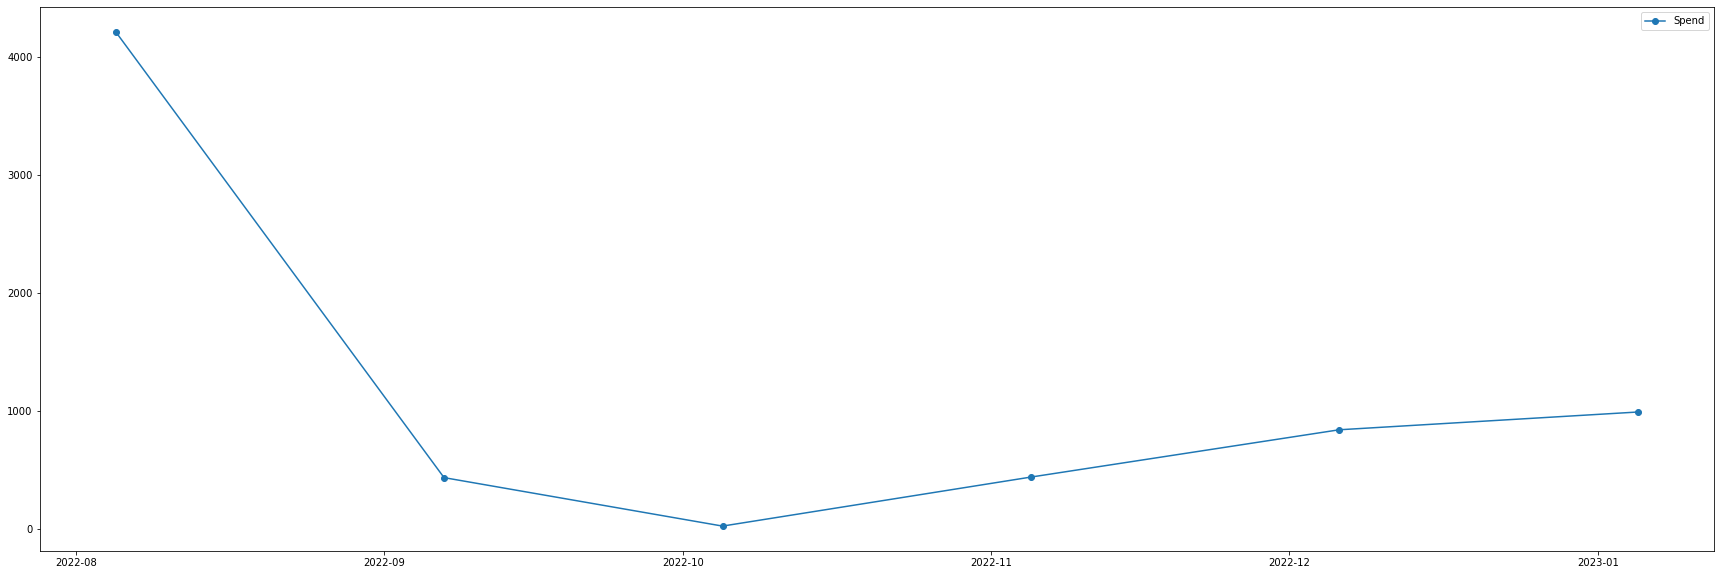

Income
Not Found In Budget
Average Spending: -4276.82
Not Found In Budget
Not Found In Budget


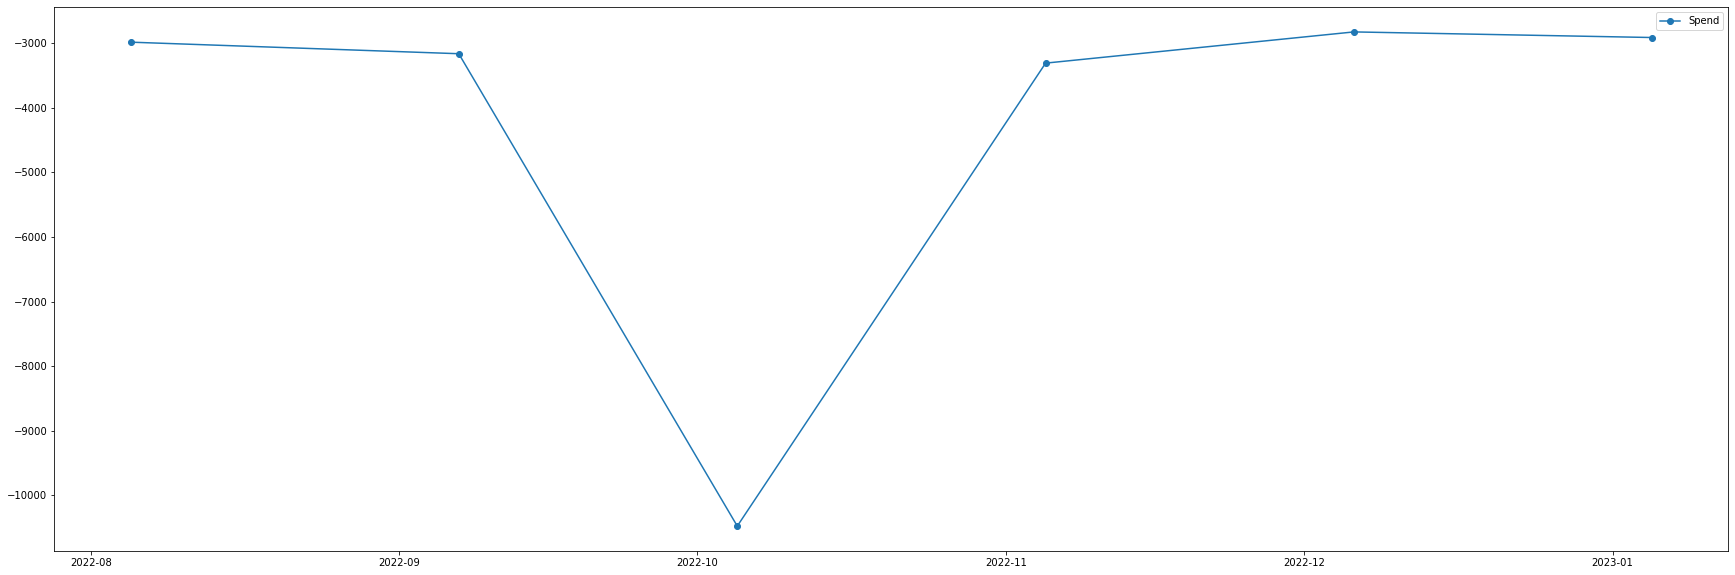

Spending
Budgeted Amount: 600.0
Average Spending: 829.91
Average Varience 229.91


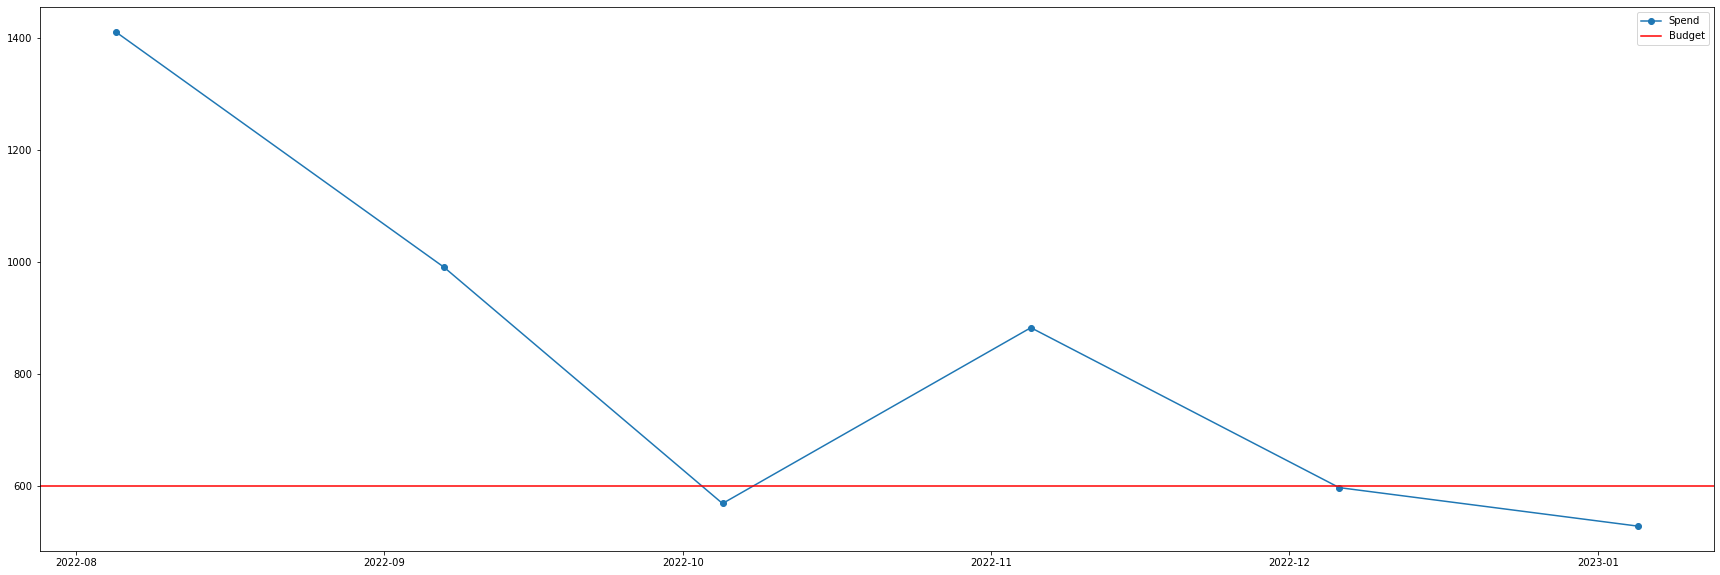

Fees
Budgeted Amount: 10.95
Average Spending: 26.7
Average Varience 15.75


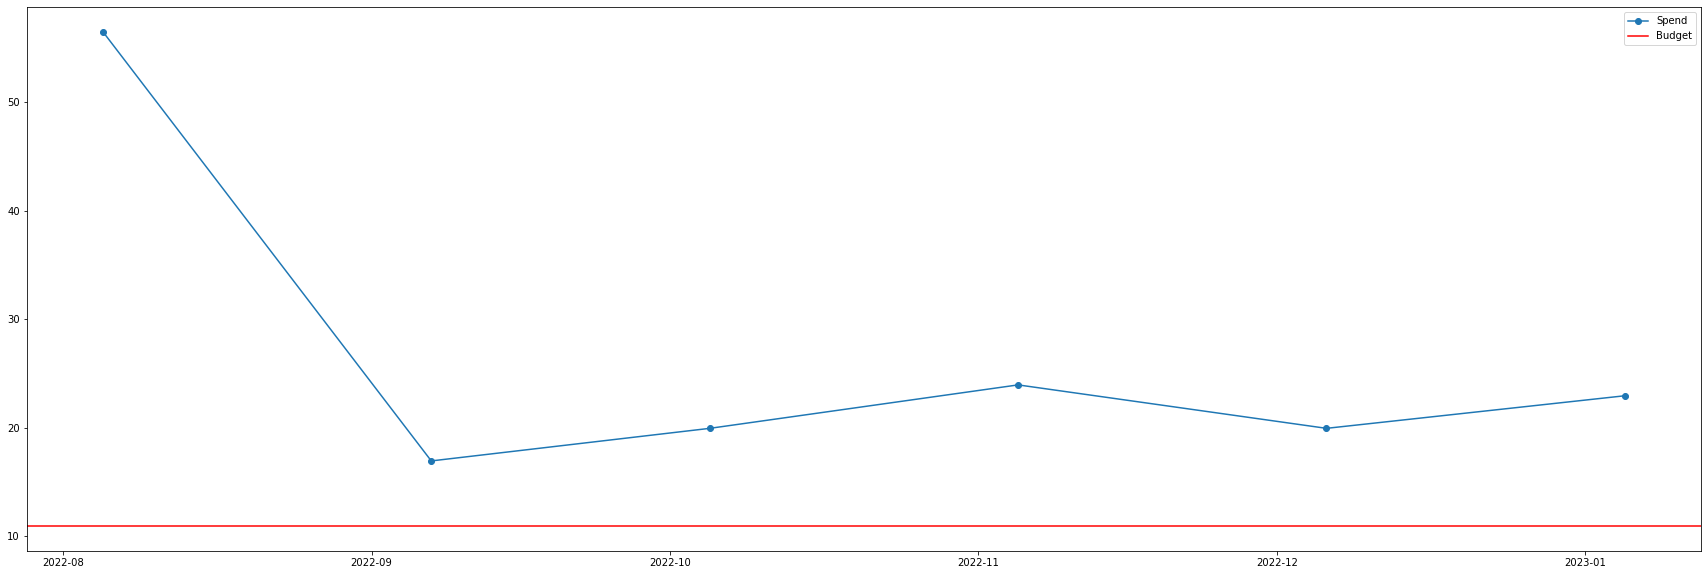

Food
Budgeted Amount: 600.0
Average Spending: 804.14
Average Varience 204.14


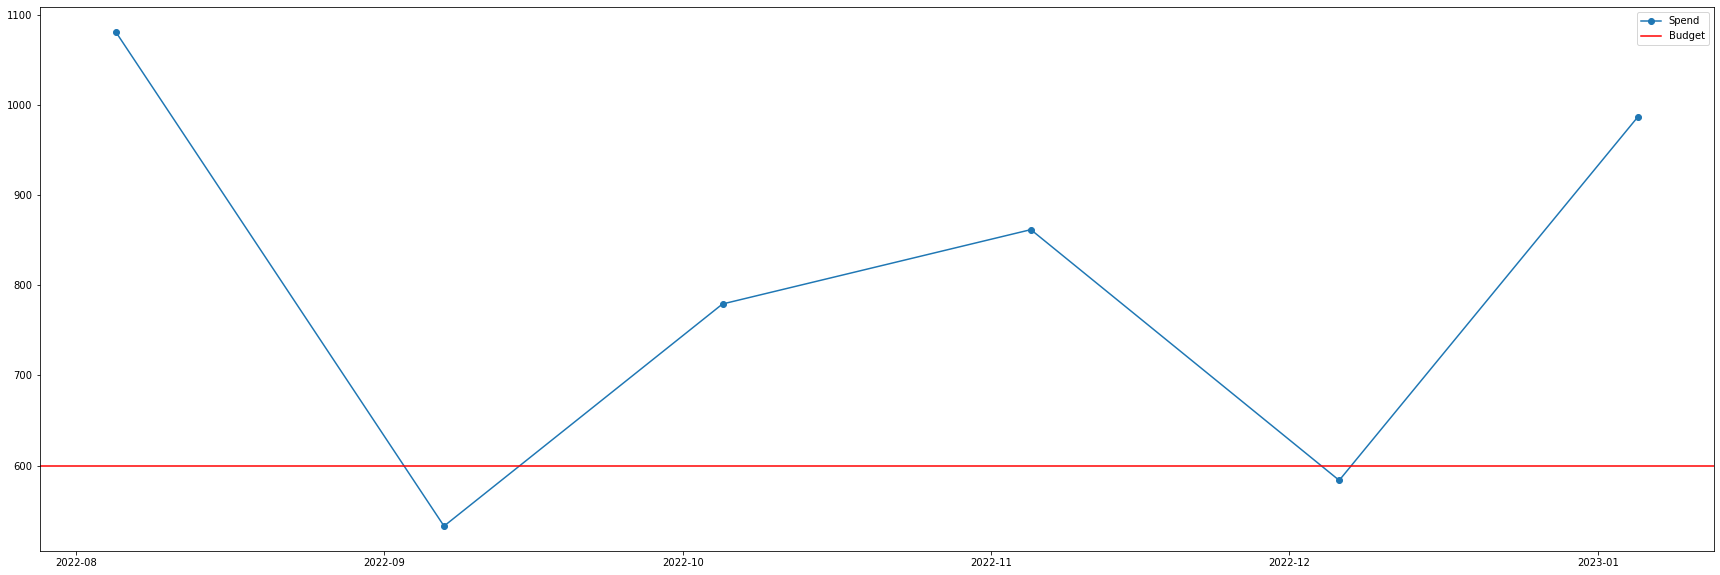

Gas
Budgeted Amount: 250.0
Average Spending: 345.67
Average Varience 95.67


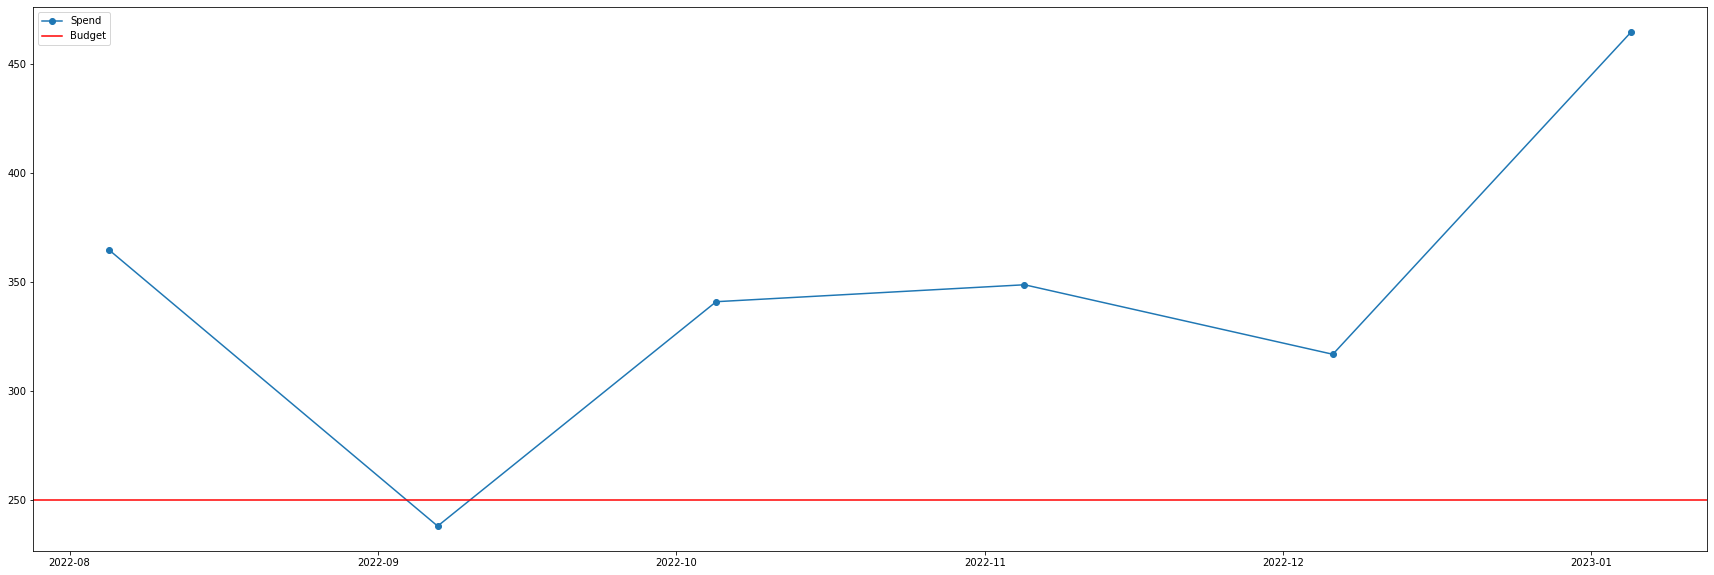

Interest
Not Found In Budget
Average Spending: -0.07
Not Found In Budget
Not Found In Budget


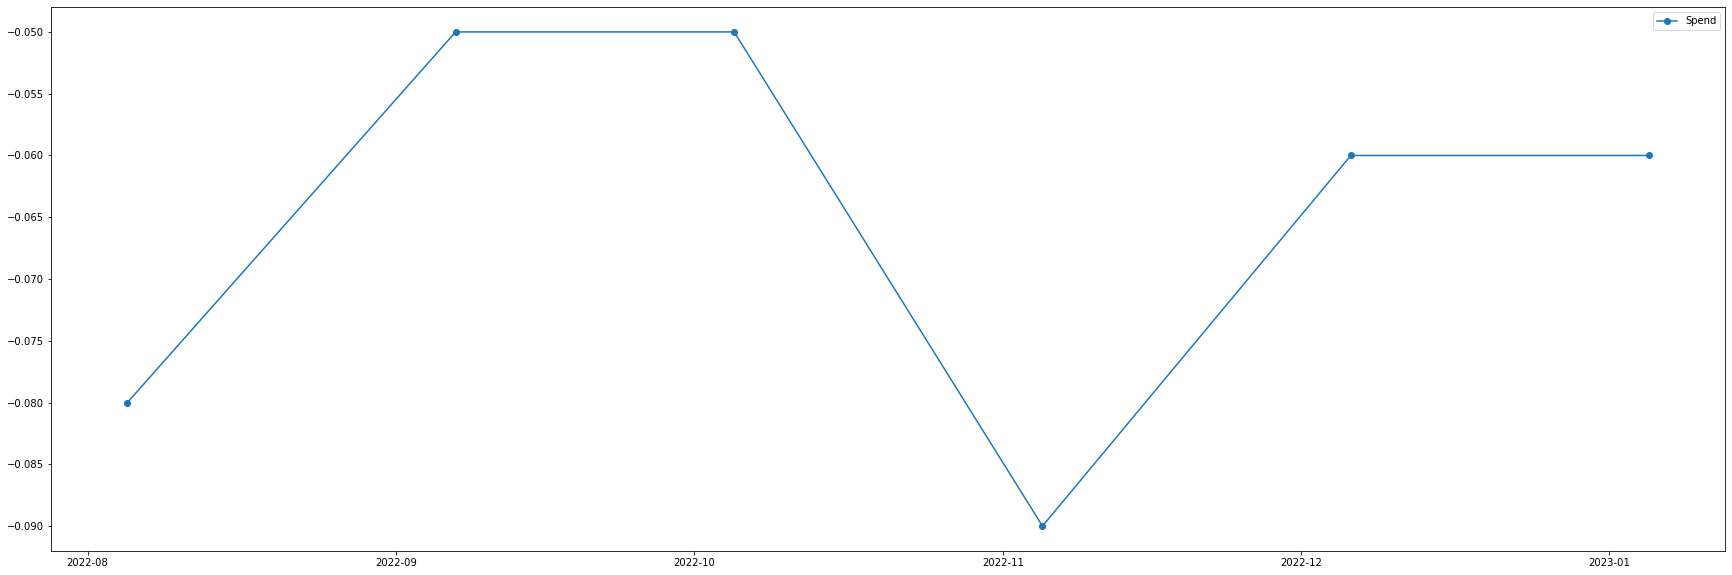

Phone
Budgeted Amount: 61.6
Average Spending: 61.6
Average Varience 0.0


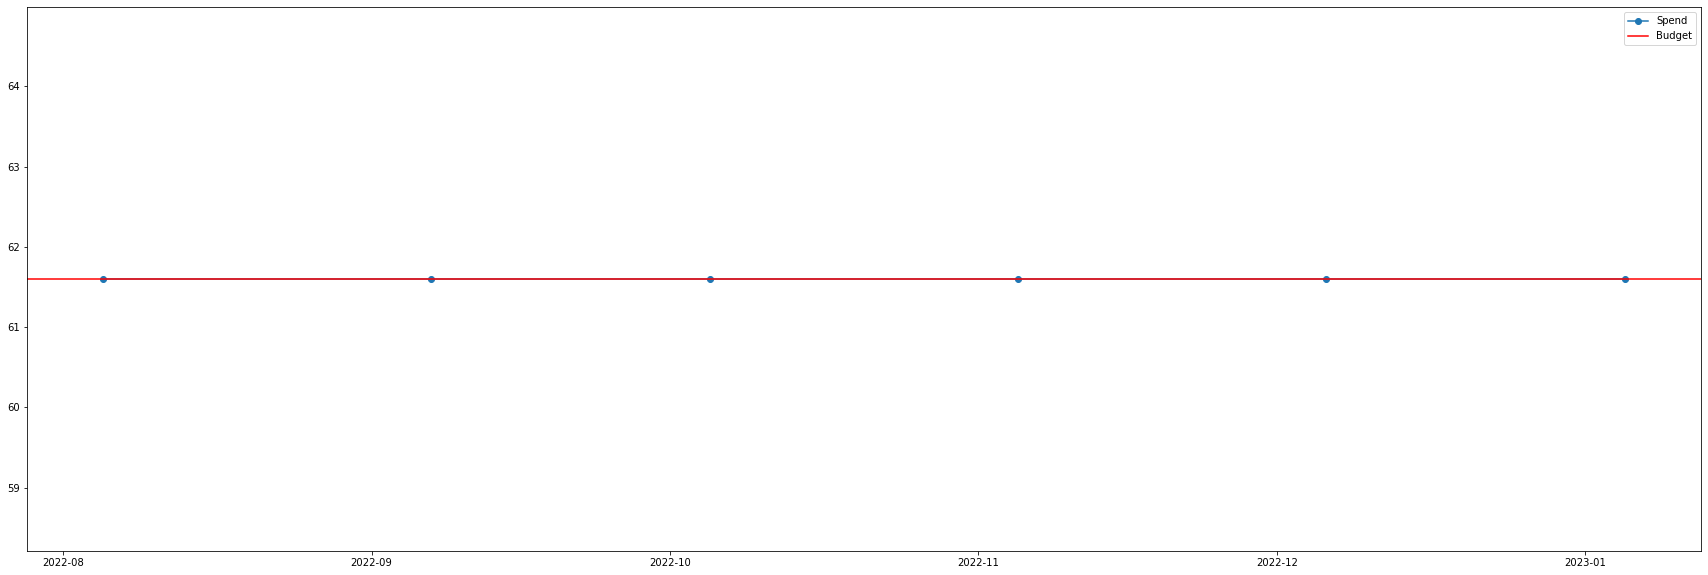

Rent/Internet
Budgeted Amount: 930.9
Average Spending: 962.84
Average Varience 31.94


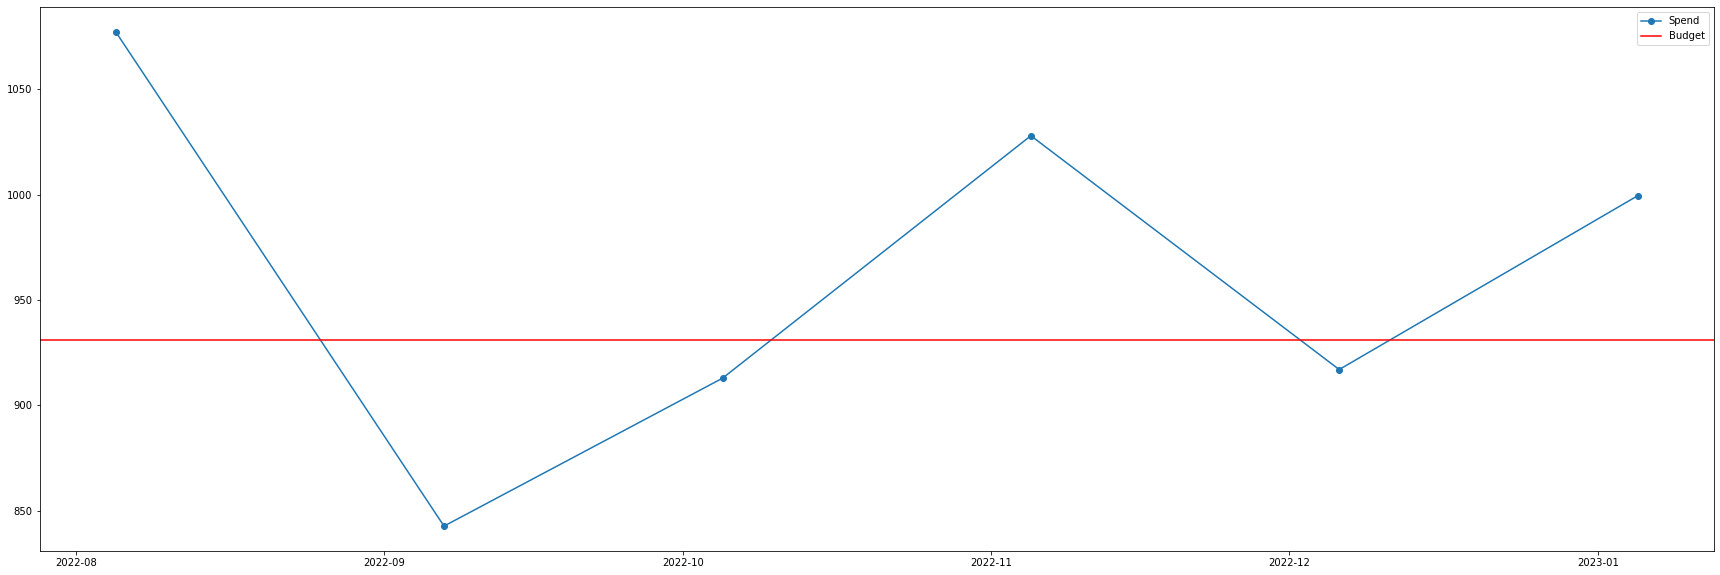

Student Loan
Budgeted Amount: 61.6
Average Spending: 63.55
Average Varience 1.95


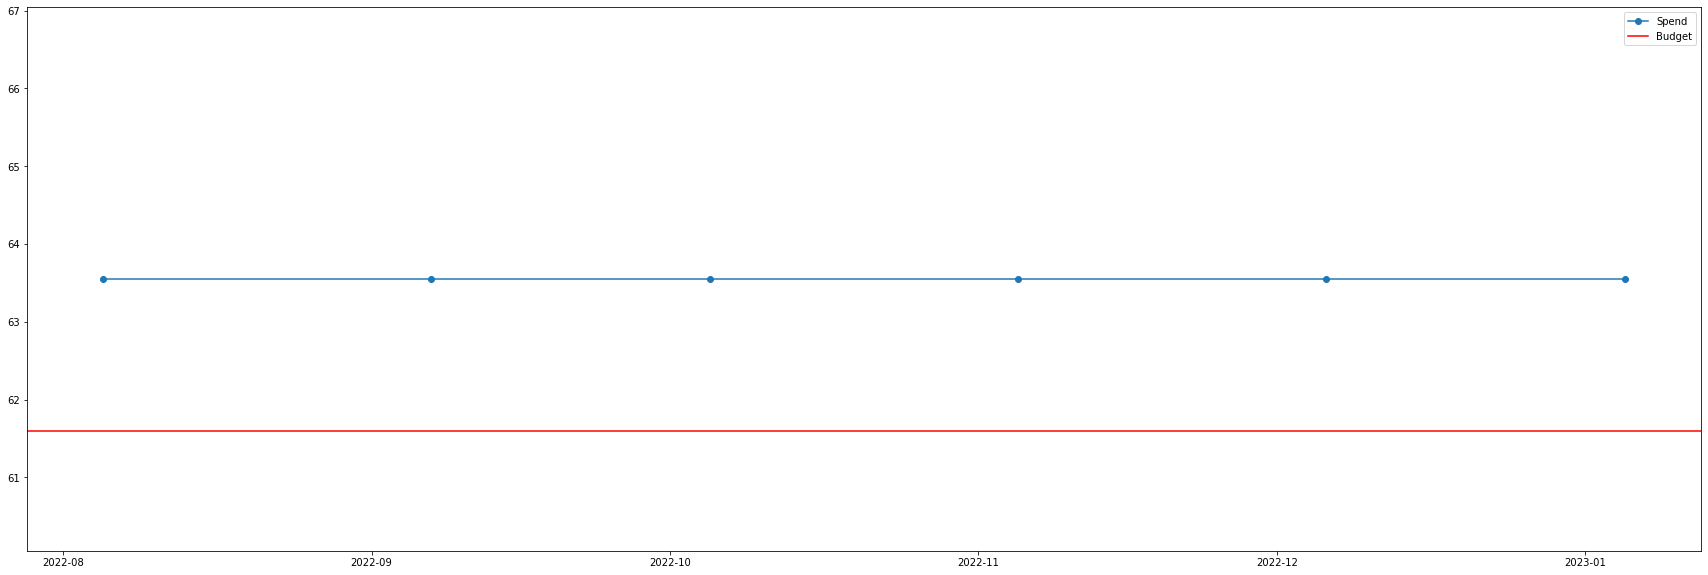

Car Insurance
Not Found In Budget
Average Spending: 84.67
Not Found In Budget
Not Found In Budget


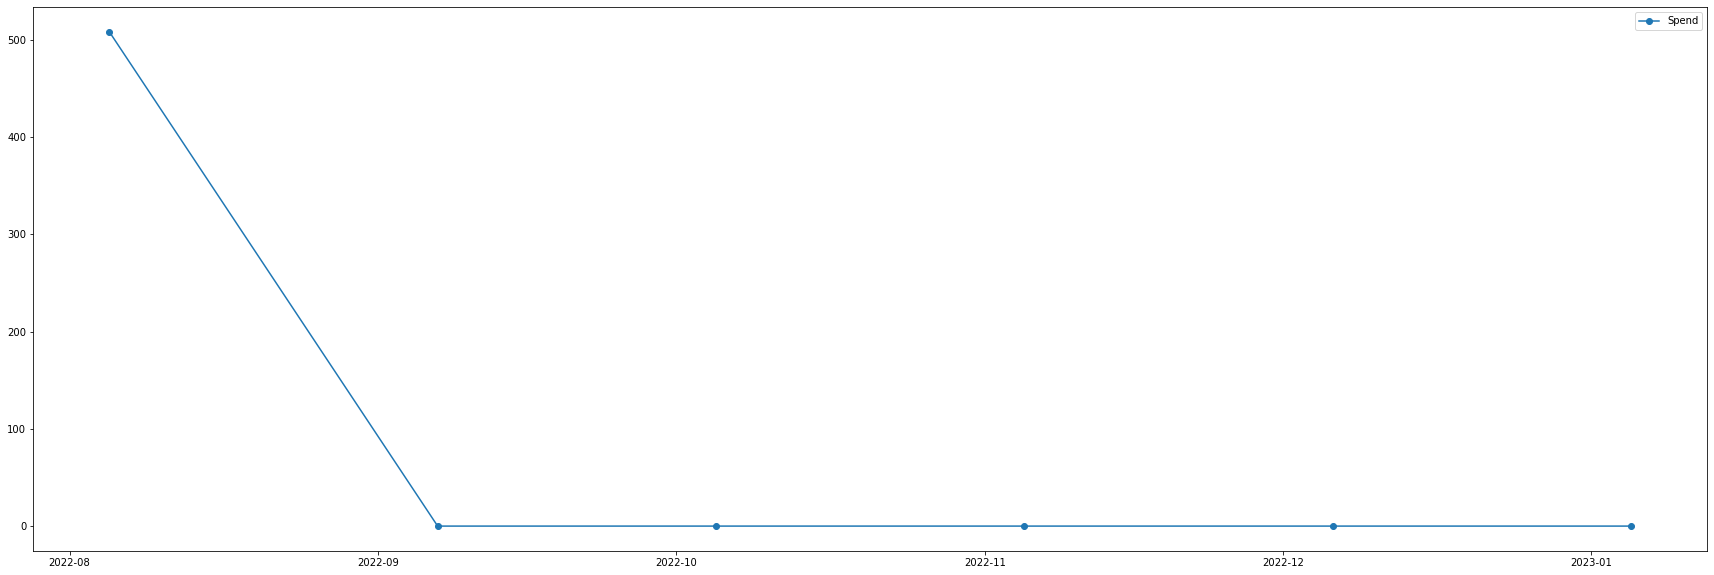

Savings
Not Found In Budget
Average Spending: 5.83
Not Found In Budget
Not Found In Budget


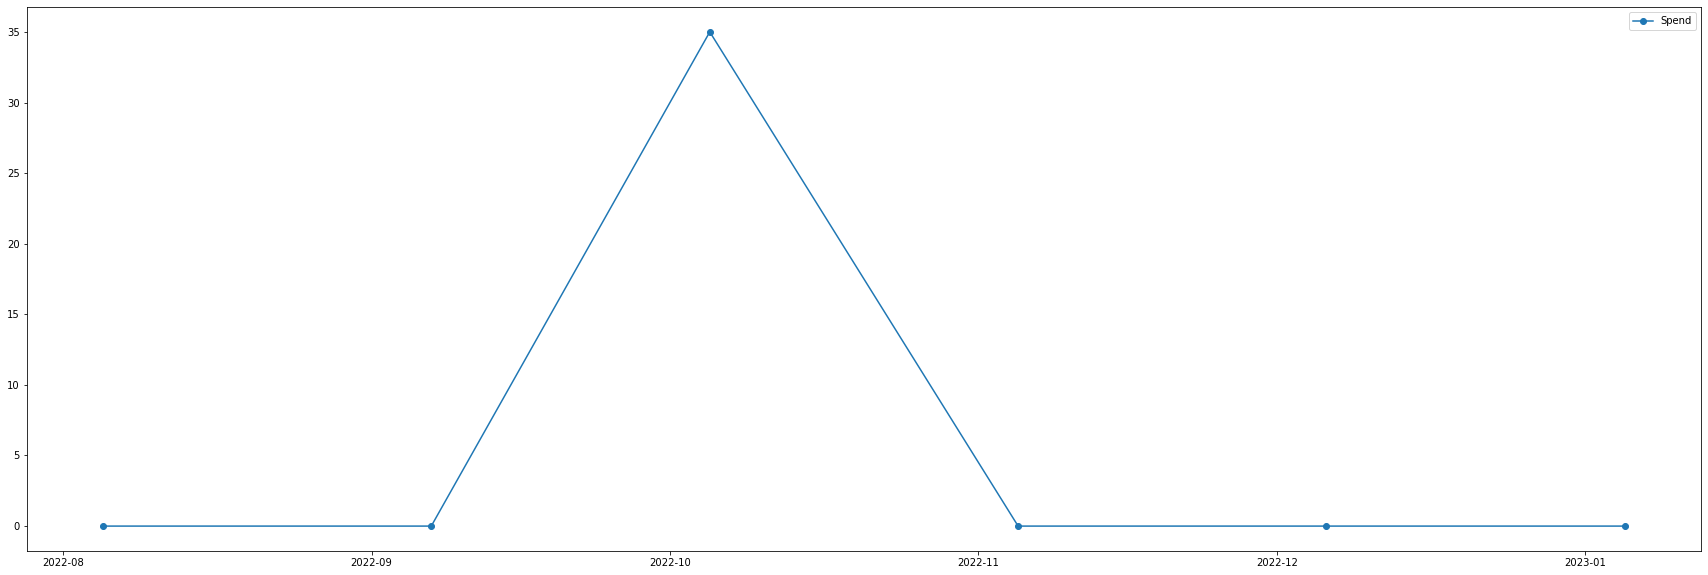

Bike Maintenance 
Not Found In Budget
Average Spending: 16.1
Not Found In Budget
Not Found In Budget


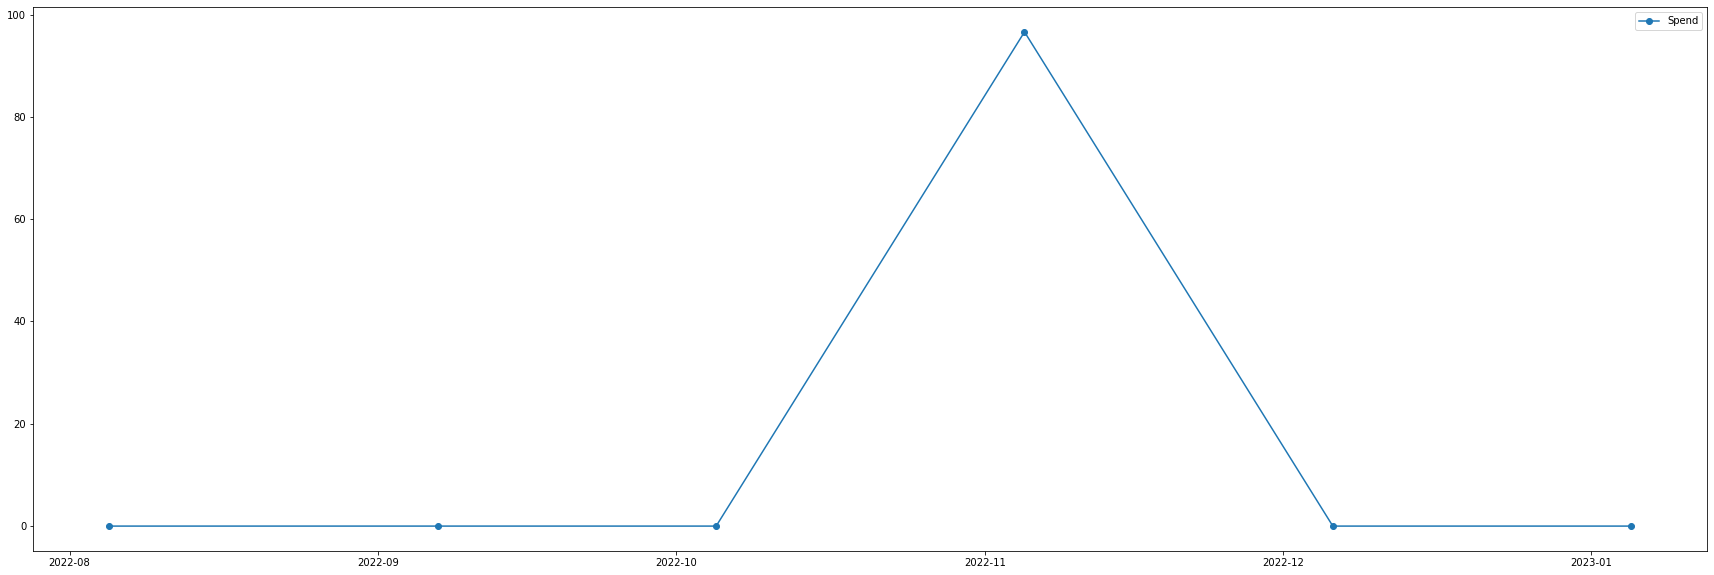

Investment
Not Found In Budget
Average Spending: 898.83
Not Found In Budget
Not Found In Budget


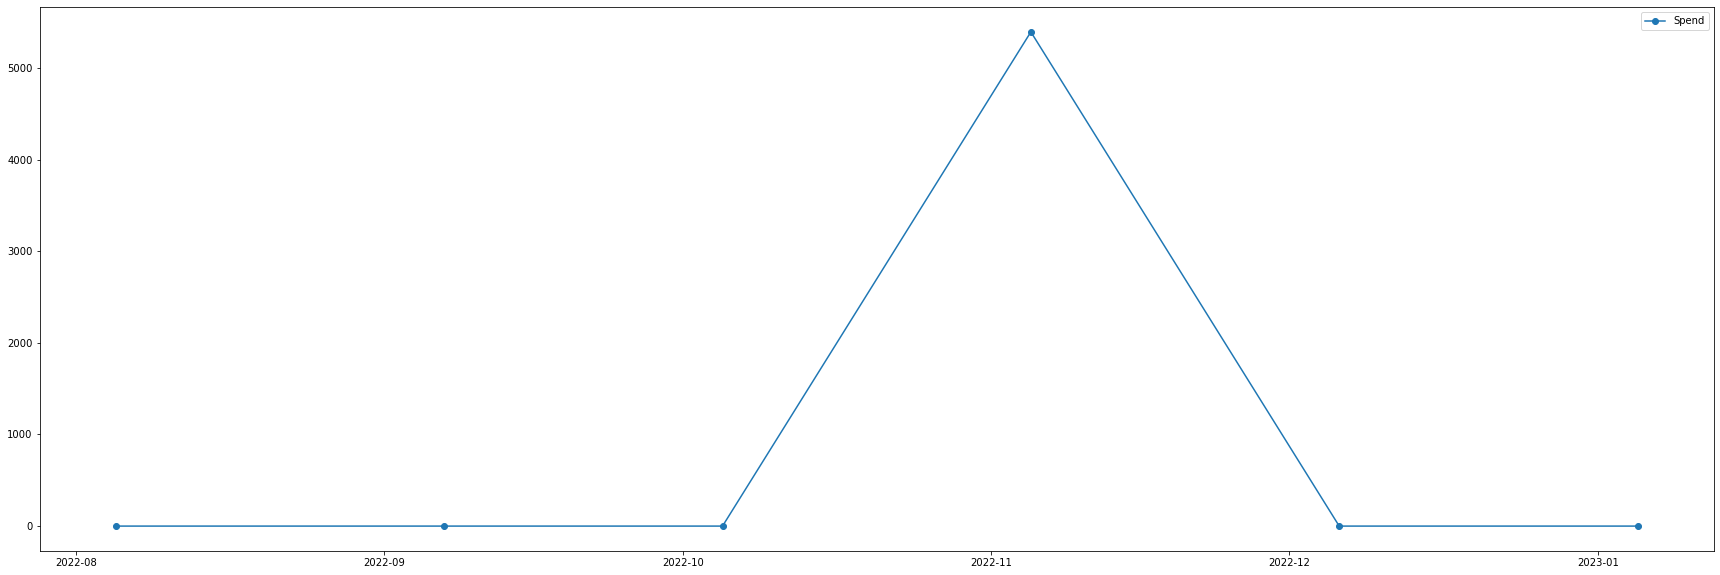

Car Maintenance
Budgeted Amount: 150.0
Average Spending: 25.94
Average Varience -124.06


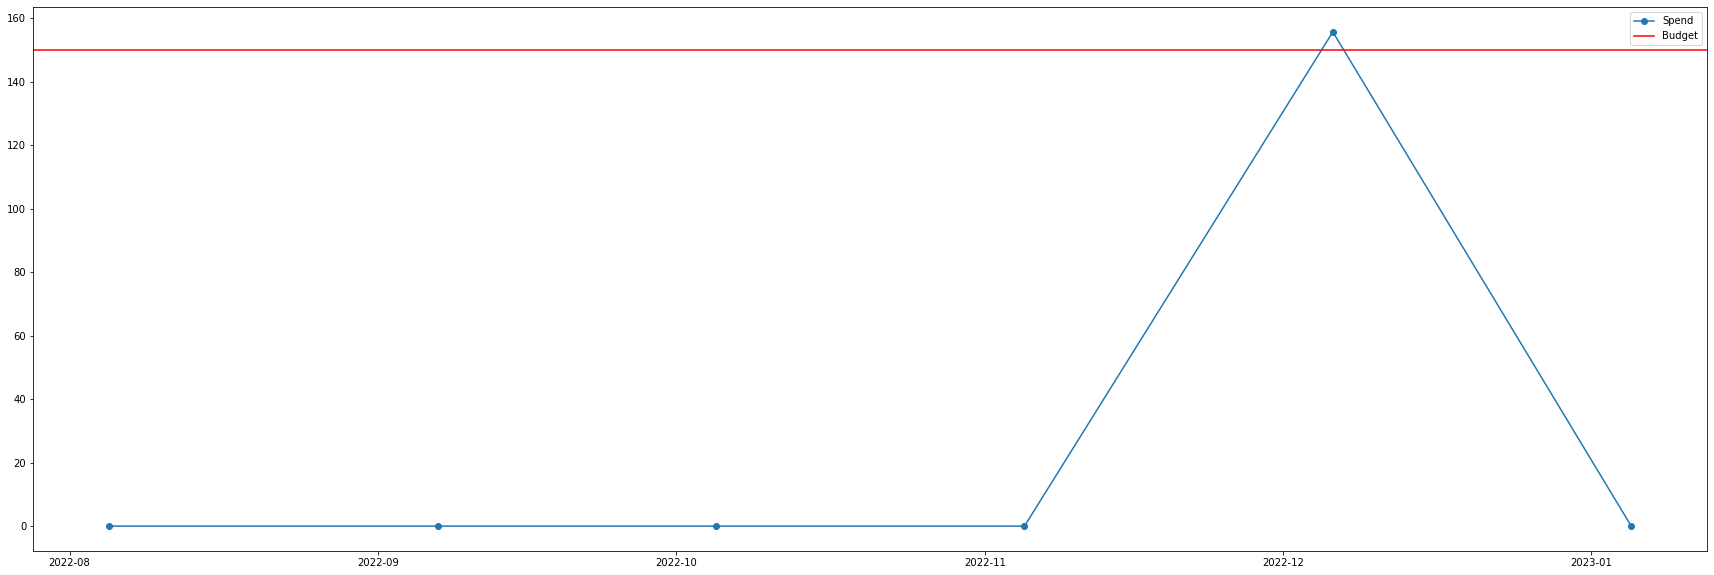

In [18]:
for i in ds.columns[2:-1]:
    b = budget[budget['Category'] == i]
    print(i)

    if b['Amount'].any() == False:
        print('Not Found In Budget')
    else:
        print('Budgeted Amount:', b['Amount'].item())

    print('Average Spending:', round(ds[i].mean(), 2))

    if b['Amount'].any() == False:
        print('Not Found In Budget')
    else:
        avgvar = ds[i].mean() - b['Amount'].item()
        print('Average Varience', round(avgvar, 2))


    plt.figure(figsize=(30,10))
    plt.plot(ds['Statement Start'], ds[i], label = 'Spend', marker = 'o')
    if b['Amount'].any() == False:
        print('Not Found In Budget')
    else:
        plt.axhline(y = b['Amount'].item(), color = 'r', linestyle = '-', label = 'Budget')
    plt.legend()
    plt.show()

## New Budget
#### The graphs above showed the need for a revised budget. But what should the new budget be? 
#### The method used here takes an average of spending in each category and compares this to the previously budgeted amount. This average will be used as a guide for creating a new budget.
#### The graphs above showed that August was characterized by abnormally high spending. To get an accurate average I have created a new slice of the dataset that excludes this outlier.

### Income Classes:
#### This 'Income' class takes a name, payment amount, payment period, and weekly hours, which it uses to calculate monthly earnings before and after tax. This information is important for designing an achievable budget.

In [19]:
class Income:
    def __init__(self, name, amount, period, weekly_hours = 35):
        self.name = name
        self.amount = amount
        self.period = period
        self.weekly_hours = weekly_hours

        #compute the hourly rate as a base
        if self.period == 'hourly':
            self.hourly_rate = self.amount
        elif self.period == 'weekly':
            self.hourly_rate = self.amount/self.weekly_hours
        elif self.period == 'bi-weekly':
            self.hourly_rate == self.amount/(weekly_hours *2)
        elif self.period == 'monthly':
            self.hourly_rate == self.amount/(weekly_hours * (52/12))
        elif self.period == 'yearly':
            self.hourly_rate == self.amount/(52*self.weekly_hours)
        
        #tax rate
        self.yearly_rate = self.hourly_rate * 52 * self.weekly_hours
        canadianincometax = {'taxable income': [0, 42184.00, 49020.00, 84369.00, 96866.00, 98040.00, 117623.00, 151978.00, 159483.00, 216511.00, 222420.00], 'tax rate': [0.2006, 0.227, 0.282, 0.31, 0.3279, 0.3829, 0.407, 0.4402, 0.4612, 0.498, 0.535]}
        self.tax_table = pd.DataFrame(canadianincometax)
        p = self.tax_table.loc[self.tax_table['taxable income']<= self.yearly_rate]
        q = p.max()
        self.tax_rate = q['tax rate']

        self.weekly_income = self.hourly_rate * self.weekly_hours
        self.bi_weekly_income = self.hourly_rate * self.weekly_hours * 2
        self.monthly_income = self.hourly_rate * self.weekly_hours * (52/12)
        self.yearly_income = self.hourly_rate * self.weekly_hours * 52

        self.hourly_income_AT = self.hourly_rate * (1-self.tax_rate)
        self.weekly_income_AT = self.weekly_income * (1-self.tax_rate)
        self.bi_weekly_income_AT = self.bi_weekly_income * (1-self.tax_rate)
        self.monthly_income_AT = self.monthly_income * (1-self.tax_rate)
        self.yearly_income_AT = self.yearly_income * (1-self.tax_rate)

    def intro(self):
        print('Name:', self.name)
        print('Amount:', self.amount)
        print('Period:', self.period)
        print('Monthly Income: ', round(self.monthly_income, 2))
        print('Monthly Income After Taxes: ', round(self.monthly_income_AT, 2))

In [20]:
budget

,Category,Amount,Type
0,Food,600.00,Variable
1,Spending,600.00,Variable
2,Rent/Internet,930.90,Fixed
3,Phone,61.60,Fixed
4,Gas,250.00,Variable
5,Car Maintenance,150.00,Variable
6,Fees,10.95,Fixed
7,Student Loan,61.60,Fixed


In [21]:
ds1 = expenditure[3:]
ds1

Account,Statement Start,Statement End,Else,Income,Spending,Fees,Food,Gas,Interest,Phone,Rent/Internet,Student Loan,Car Insurance,Savings,Bike Maintenance,Investment,Car Maintenance,Total Balance
3,2022-09-07,2022-10-04,437.21,-3161.12,990.92,16.95,532.83,238.20,-0.05,61.6,842.76,63.55,0.0,0.0,0.0,0.0,0.00,22.85
4,2022-10-05,2022-11-04,27.00,-10477.64,568.70,19.95,779.24,341.00,-0.05,61.6,912.90,63.55,0.0,35.0,0.0,0.0,0.00,-7668.75
5,2022-11-05,2022-12-05,441.80,-3306.68,882.91,23.95,861.69,348.76,-0.09,61.6,1027.88,63.55,0.0,0.0,96.6,5393.0,0.00,5894.97
6,2022-12-06,2023-01-04,842.12,-2823.25,597.08,19.95,583.58,316.91,-0.06,61.6,917.00,63.55,0.0,0.0,0.0,0.0,155.65,734.13
7,2023-01-05,2023-02-06,992.42,-2910.23,528.32,22.95,986.45,464.60,-0.06,61.6,999.40,63.55,0.0,0.0,0.0,0.0,0.00,1209.00


#### Creating an Income Object to use in the new budget.

In [22]:
constructionJob = Income('Construction', 25, 'hourly', weekly_hours= 37.5)
constructionJob.intro()

Name: Construction
Amount: 25
Period: hourly
Monthly Income:  4062.5
Monthly Income After Taxes:  3140.31


#### The script below creates a chart of the old budget values, and average spending for the selected period, and creates new columns for the new amount and type, which will be filled in shortly.

In [23]:
newBudget = pd.DataFrame(columns=['Account', 'Old Amount', 'Average', 'New Amount'])
n=2
for i in ds1.columns[2:-1]:
    Account = ds1.columns[n]
    avg = round(ds1[i].mean(), 2)


    b = budget[budget['Category'] == i]

    if b['Amount'].any() == False:
        old = 0
    else:
        old = b['Amount'].item()


    newBudget = newBudget.append(pd.Series([Account,old,avg,avg], index=newBudget.columns), ignore_index=True)
    
    n= n+1

newBudget = newBudget.drop(13)
newBudget['Type'] = ''
newBudget

,Account,Old Amount,Average,New Amount,Type
0,Else,0,548.11,548.11,
1,Income,0,-4535.78,-4535.78,
2,Spending,600.0,713.59,713.59,
3,Fees,10.95,20.75,20.75,
4,Food,600.0,748.76,748.76,
5,Gas,250.0,341.89,341.89,
6,Interest,0,-0.06,-0.06,
7,Phone,61.6,61.60,61.60,
8,Rent/Internet,930.9,939.99,939.99,
9,Student Loan,61.6,63.55,63.55,


#### Using the averages computed above, I can create a new budget for myself in the future. I have tried to stick to round numbers and used the Income object as the monthly value for income. Each budget item is characterized as a fixed or variable expense.

### Notes:
#### In the case of Car Insurance, this is not an expense paid monthly. However, it would be wise to set aside some money each month to pay the yearly bill. 

In [24]:
#Else
newBudget.iloc[0,4] = 'Variable'
newBudget.iloc[0,3] = 0
#Income
newBudget.iloc[1,4] = 'Income'
newBudget.iloc[1,3] = round(-constructionJob.monthly_income_AT,2)
#Spending
newBudget.iloc[2,4] = 'Variable'
newBudget.iloc[2,3] = 750
#Fees
newBudget.iloc[3,4] = 'Variable'
newBudget.iloc[3,3] = 23
#Food
newBudget.iloc[4,4] = 'Variable'
newBudget.iloc[4,3] = 750
#Gas
newBudget.iloc[5,4] = 'Variable'
newBudget.iloc[5,3] = 350
#Interest
newBudget.iloc[6,4] = 'Income'
#Phone
newBudget.iloc[7,4] = 'Fixed'
#Rent/Internet
newBudget.iloc[8,4] = 'Fixed'
newBudget.iloc[8,3] = 930.9
#Student Loan
newBudget.iloc[9,4] = 'Fixed'
newBudget.iloc[9,3] = 0
#Car Insurance
newBudget.iloc[10,4] = 'Fixed'
newBudget.iloc[10,3] = 125
#Savings
newBudget.iloc[11,4] = 'Variable'
newBudget.iloc[11,3] = 0
#Bike Maintenance
newBudget.iloc[12,4] = 'Variable'
newBudget.iloc[12,3] = 0
#Car Maintence
newBudget.iloc[13,4] = 'Variable'

#### Now that the new budget values have been added, it's time to see the final product. The script below generates the completed chart, with summaries of fixed and variable costs, average total spend and income, and the difference between the two. Note that this chart measures income as a negative number, so a difference below 0 means money left over after expenses.

In [25]:
inlist = ['Income', 'Interest']

inFlow = newBudget[newBudget['Account'].isin(inlist)]
outFlow = newBudget[~newBudget['Account'].isin(inlist)]
averageTotalSpend = round(outFlow['Average'].sum(),2)
averageTotalIncome = round(inFlow['Average'].sum(), 2)
averageDifference = averageTotalSpend + averageTotalIncome

averageNewSpend = round(outFlow['New Amount'].sum(),2)
averageNewIncome = round(inFlow['New Amount'].sum(), 2)
newDifference = averageNewSpend + averageNewIncome

fixed = newBudget[newBudget['Type'] == 'Fixed'].sum()
variable = newBudget[newBudget['Type'] == 'Variable'].sum()

print('Values for New Budget\n')
print('Previous')
print('Budgeted Fixed Costs', round(fixed['Average'], 2))
print('Budgeted Variable Costs', round(variable['Average'],2))
print('Average Total Spend', averageTotalSpend)
print('Average Total Income', averageTotalIncome)
print('Average Difference', round(averageDifference, 2), '\n')


print('Estimated New')
print('Budgeted Fixed Costs', round(fixed['New Amount'], 2))
print('Budgeted Variable Costs', round(variable['New Amount'], 2))
print('Projected Total Spend', averageNewSpend)
print('Projected Total Income', averageNewIncome)
print('Projected Difference', round(newDifference, 2))

newBudget

Values for New Budget

Previous
Budgeted Fixed Costs 1065.14
Budgeted Variable Costs 2430.55
Average Total Spend 3495.69
Average Total Income -4535.84
Average Difference -1040.15 

Estimated New
Budgeted Fixed Costs 1117.5
Budgeted Variable Costs 1904.13
Projected Total Spend 3021.63
Projected Total Income -3140.37
Projected Difference -118.74


,Account,Old Amount,Average,New Amount,Type
0,Else,0,548.11,0.00,Variable
1,Income,0,-4535.78,-3140.31,Income
2,Spending,600.0,713.59,750.00,Variable
3,Fees,10.95,20.75,23.00,Variable
4,Food,600.0,748.76,750.00,Variable
5,Gas,250.0,341.89,350.00,Variable
6,Interest,0,-0.06,-0.06,Income
7,Phone,61.6,61.60,61.60,Fixed
8,Rent/Internet,930.9,939.99,930.90,Fixed
9,Student Loan,61.6,63.55,0.00,Fixed
